In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from __future__ import division
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

Cross Validation (inspired by problem 8)

Make & explore the data:
You will generate datasets using the following function.  Include this code early in your python file so you can call it in later code chunks.  Note that in this data, x is a predictor / feature and y is a response variable. 


In [43]:
def makeData(myseed):
    np.random.seed(myseed)   #dont forget to import numpy as np
    #y = np.zeros(shape = 100) #100  0-1 normal floats
    x = np.random.normal(size=100) #100  0-1 normal floats
    y = x-2*(x**2)+np.random.normal(size = 100)
    df = pd.DataFrame({'x':x, 'y':y})
    return(df)

Call the function to make a dataset:  df1=makeData(1).  Answer the following questions:  How many observations?  How many features/predictors?  Determine and display the value of n (count the observations) and the value for p (count the predictors) in this dataset  


In [44]:
df1 = makeData(1)
n = len(df1)
#p = 
print("Observations: ", len(df1))
print("Features/Predictors: ", )

Observations:  100
Features/Predictors: 


Create a scatterplot of X against Y.  Describe the shape of the data.  What kind of relationship will fit the data?  Linear?  Polynomial (and if so, what order of polynomial)?  


<font color = 'red'>There appears to be a polynomial relationship to the data. Possibly quadratic.</font>

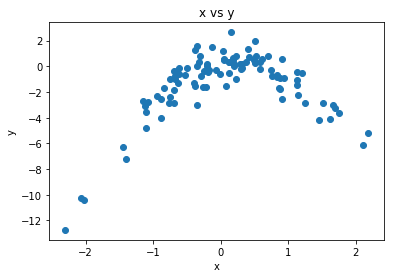

In [45]:
fig, ax = plt.subplots()
ax.scatter(df1['x'],df1['y'])
ax.set_title('x vs y')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Form an official hypothesis and state it.

In [46]:
def polyDesignMatrix(x, p):
    x = np.array(x)  # dont forget to import numpy as np
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return(X)


Create a function to run LOOCV to return cross-validation performance on a linear regression model with polynomial terms. The signature of a call to this function is LOOCVerr(df, modelOrder), where the dataset is df and the maximum term order is defined by modelOrder.   This function should return a vector of n cross validation error values (squared error terms) that result from n repetitions of training the model on all but the ith observation and predicting on the ith observation.   


In [47]:
def LOOCVerr(df, modelOrder):
    ones = pd.DataFrame(np.ones(np.shape(df["x"])[0]))
    y = df["y"].values
    X = pd.concat([ones,df[["x"]]], axis = 1)
    if modelOrder > 1:
        for i in range(2,modelOrder+1):
            X[i]= X[["x"]]**i
    X = X.values
    clf = LinearRegression()
    clf.fit(X, y)
    ypred = clf.predict(X)
    xbar = np.mean(X, axis=0)
    xsum = np.sum(np.power(X - xbar, 2))
    nrows = np.shape(X)[0]
    mses = []
    for row in range(0, nrows):
        hi = (1 / nrows) + (np.sum(X[row] - xbar) ** 2 / xsum)
        mse = (y[row] - ypred[row]) ** 2 / (1 - hi)
        mses.append(mse)
    return mses

Using df1 (where you ran makeData with a seed of 1) build a for-loop to run LOOCV to generate error vectors using modelOrder values from 1 through 4.  LOOCV will build and return squared error vectors for 4 separate models which were evaluated with linear, linear+quadratic, linear+quadratic+cubic, and linear+quadratic+cubic+quartic terms.    


Plot the results from your LOOCV on models of order 1 through 4.  This plot should have the model order on the x axis and mean squared error on the y axis (MSE is the mean of the squared values of the error terms on the y axis).  Determine the model order with the minimum cross-validation MSE and indicate the minimizing model order on the plot & report it. 


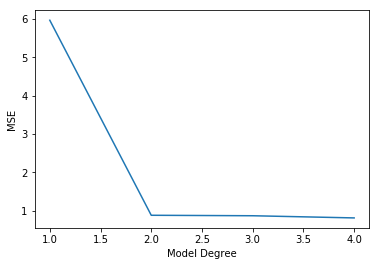

In [48]:
MSE = []
for n in range(1,5,1):
    MSE.append(np.mean(LOOCVerr(df1,n)))
plt.plot(range(1,5), MSE)
plt.xlabel("Model Degree")
plt.ylabel("MSE")
plt.show()

Now you will explore the results of model fittings by simulating different samples of the original population.  Using a nested for loop, generate datasets using 10 different seeds (1 through 10).   Then obtain LOOCV squared errors on model orders 1 through 4.  After you receive each error term vector, compute the MSE as a scalar value.  Store the results in a new dataframe which has 3 columns (“myseed”, “modelOrder”, and “MSE”).  


In [49]:
sim = pd.DataFrame()
myseed = []
modelOrder = []
MSEs = []
for i in range(1,11):
    df = makeData(i)
    for o in range(1,5):
        MSEs.append(np.mean(LOOCVerr(df,o)))
        modelOrder.append(o)
        myseed.append(i)
colnames = ["myseed","modelOrder", "MSE"]
data = [myseed, modelOrder, MSEs]
for c,d in zip(colnames,data):
    sim[c] = d

Make a new “spaghetti plot” (like book figure 5.4 right side subplot) using the new dataframe you created in step 7.  The x axis represents the model order and the y axis represents the avgError.  Each of the 10 lines in your plot should represent the LOOCV MSE over model order for one dataset generated from a specific seed.  


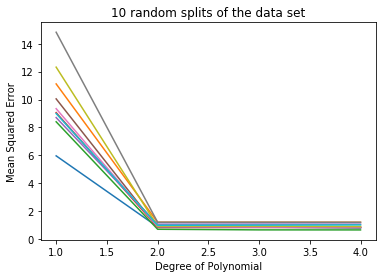

In [50]:
MSEtable = pd.DataFrame()
MSEs = np.array(MSEs)
splitarray = np.split(MSEs,10)
splitarray = np.array(splitarray).T
for i in range(0,10):
    MSEtable[i] = splitarray[:,i]
MSEtable[10] = [1,2,3,4]

for i in range(0,10):
    plt.plot(MSEtable[10],MSEtable[i])
plt.title('10 random splits of the data set')
plt.ylabel('Mean Squared Error')
plt.xlabel('Degree of Polynomial')
plt.show()

Design, code, and execute a technique for (mathematically) determining which order of model has the smallest total LOOCV error.  Report which order of model had the smallest total LOOCV error.  Is that what you expected in your hypothesis?  
Be careful on this step:  you are not trying to determine which seed had the lowest error, but rather which order of model had the lowest overall error across all the seeds, so there may be some data-wrangling required in order to obtain the answer.


In [51]:
MSEtable = MSEtable.set_index(MSEtable[10])
MSEtable.index.name = "Degree"
del MSEtable[10]
MSEtable['mean MSE across seeds'] = MSEtable.mean(1)
DegreeMinError = MSEtable['mean MSE across seeds'].idxmin()
print('Degree Polynomial of Minimum CV Erorr: ', DegreeMinError)



Degree Polynomial of Minimum CV Erorr:  4


## Exploring Other Validation Methods:

Build another function to perform validation using the “validation set approach” described in section 5.1.1 where a randomly-selected half of the dataset is used for training, and the remaining portion is used for validation.  Your function should have the signature VALSETerr(df,modelOrder,splitseed) and it should return a SINGLE MSE value of the prediction quality on the validation set.  The randomness should be repeatable, based on controlling the random seed in the data permutation before the split using splitseed.


In [52]:
def VALSETerr(df,modelOrder,splitseed):
    train=df.sample(frac=0.5,random_state= splitseed)
    test=df.drop(train.index)
    train = train.reset_index()
    test = test.reset_index()
    ytrain, ytest = train["y"].values, test["y"].values
    ones = pd.DataFrame(np.ones(np.shape(train["x"])[0]))
    Xtrain = pd.concat([ones,train[["x"]]], axis = 1)
    Xtest =  pd.concat([ones,test[["x"]]], axis = 1)
    if modelOrder > 1:
        for i in range(2,modelOrder+1):
            Xtrain[i]= Xtrain[["x"]]**i
            Xtest[i]= Xtest[["x"]]**i
    Xtrain, Xtest = Xtrain.values, Xtest.values
    clf = LinearRegression()
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    mse = mean_squared_error(ypred, ytest)
    return mse

Build another function to perform k-fold cross validation as described in the book section 5.1.3.  This function will have the signature KFOLDerr(df,modelOrder,k,splitseed) and will return a k-length vector of total-error terms. Each total-error term represents the mean of the MSEs computed on each of the k folds. Membership of the data in each fold should be determined randomly.  Hint:  When partitioning the data into folds be careful to write code that handles non-integer fold-sizes appropriately.  The randomness should be repeatable, based on controlling the random seed in the data permutation before the determination of the fold memberships using splitseed.


In [53]:
def KFOLDerr(df,modelOrder,k,splitseed):
    df = df.sample(frac = 1, random_state = splitseed)
    if modelOrder > 1:
       for i in range(2,modelOrder+1):
          df[i]= df[["x"]]**i
    dfsplit = np.split(df, k)
    mse = []
    for n in range(k): 
        test = pd.DataFrame(dfsplit[n])
        ex = [x for i,x in enumerate(dfsplit) if i!=n] 
        train = pd.concat(ex)
        train = train.reset_index(drop=True)
        test = test.reset_index(drop=True)
        onestrain = pd.DataFrame(np.ones(np.shape(train["x"])[0]))
        onestest = pd.DataFrame(np.ones(np.shape(test["x"])[0]))
        ytrain, ytest = train["y"].values, test["y"].values
        Xtrain = pd.concat([onestrain,train.ix[:, train.columns != 'y']], axis = 1).values
        Xtest =  pd.concat([onestest,test.ix[:, test.columns != 'y']], axis = 1).values
        clf = LinearRegression()
        clf.fit(Xtrain, ytrain)
        ypred = clf.predict(Xtest)
        mse.append(mean_squared_error(ypred, ytest))
    return mse


In a later step we will visualize the reliability of 3 validation methods: A) validation set; B) 5-fold cross-validation; C) 10-fold cross-validation. Write code to compute and store the MSEs of each of the 3 validation methods (A, B, C) for each model order (1 through 4) on splitseed values of 1 through 10.  You are collecting a total of 
3 x 4 x 10 = 120 MSE values in this step.


In [54]:
myseed = []
modelOrder = []
VSMSE = []
KMSE5 = []
KMSE10 = []
for i in range(1,11):
    df = makeData(i)
    for o in range(1,5):
        VSMSE.append(np.mean(VALSETerr(df,o,i)))
        KMSE5.append(np.mean(KFOLDerr(df,o,5,i)))
        KMSE10.append(np.mean(KFOLDerr(df,o,10,i)))
        modelOrder.append(o)
        myseed.append(i)
colnames = ["myseed","modelOrder", "MSE"]
K5F = [myseed, modelOrder, KMSE5]
K10F = [myseed, modelOrder, KMSE10]
VSV = [myseed, modelOrder, VSMSE]
colnames = ["myseed","modelOrder", "MSE"]
data = [myseed, modelOrder, MSEs]
K5 = pd.DataFrame([])
K10 = pd.DataFrame([])
VS = pd.DataFrame([])
for c,d in zip(colnames,K5F):
    K5[c] = d
for c,d in zip(colnames,K10F):
    K10[c] = d
for c,d in zip(colnames,VSV):
    VS[c] = d
def formatTable(df):
    MSEtable = pd.DataFrame()
    MSEs = np.array(df['MSE'])
    splitarray = np.split(MSEs,10)
    splitarray = np.array(splitarray).T
    for i in range(0,10):
        MSEtable[i] = splitarray[:,i]
    MSEtable[10] = [1,2,3,4]
    MSEtable = MSEtable.set_index(MSEtable[10])
    MSEtable.index.name = "Degree"
    del MSEtable[10]
    MSEtable['mean MSE across seeds'] = MSEtable.mean(1)
    DegreeMinError = MSEtable['mean MSE across seeds'].idxmin()
    return MSEtable, DegreeMinError
VS, VSmin = formatTable(VS)
K5, K5min = formatTable(K5)
K10, K10min = formatTable(K10)

Make 3 “spaghetti plots” – one for each validation method (validation set, 5-fold, and 10-fold).  In these plots, the X axis is model order and the Y axis is MSE.  In each spaghetti plot there will be 10 lines (1 line per random seed which controlled the data split into train/val partitions).  Each of the 10 seed lines will have 4 model order points which display the MSE at each of those model orders.  For each line in a spaghetti plot, annotate the point with the lowest MSE using a datamarker (there will be one point indicated on each line).    

Validation Set


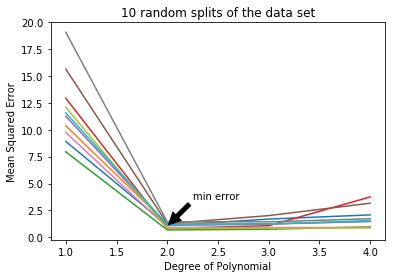

---
K 5-Fold


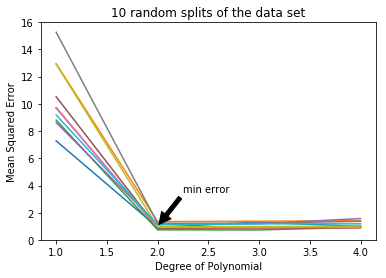

---
K 10-Fold


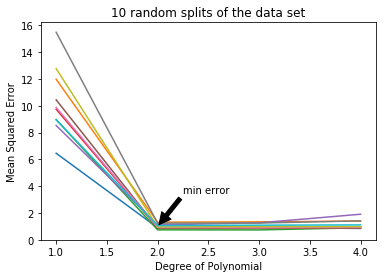

---


In [55]:
def plotSpaghetti(df,Dmin):
    for i in range(0,10):
        plt.plot(df.index.values,df[i])
    plt.title('10 random splits of the data set')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Degree of Polynomial')
    plt.annotate('min error', xy=(Dmin, df['mean MSE across seeds'][Dmin]), xytext=(Dmin+.25, df['mean MSE across seeds'][Dmin] + 2.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    plt.show()
print("Validation Set")
plotSpaghetti(VS,VSmin)
print("---")
print("K 5-Fold")
plotSpaghetti(K5, K5min)
print("---")
print("K 10-Fold")
plotSpaghetti(K10, K10min)
print("---")

Using your plots from the previous step, determine which of the validation techniques (validation set, 5-fold, and 10-fold) is most reliable for choosing model order on this dataset, and discuss your answer & reasoning. 

Validation Set

Implement code for determining the overall best-order model from each of the 4 validation methods (LOOCV, validation set, 5-fold and 10-fold crossval).  Report the best-order model chosen by each validation method.  Also, select what you believe to be the best overall model order based on the information provided by the 4 validation methods.   
